In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import math
import warnings
from IPython.display import display
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [3]:
#Import the Data 
#make the DataFrame
train = pd.read_excel('CRIME.xls', sheet_name='Sheet 1')

In [4]:
def cleaner(df):
    df.drop(df.index[:3], inplace=True)
    
    #grab the first row for the header
    new_header = df.iloc[0] 

    #take the data less the header row
    df = df[1:] 
    
    #drop useless rows at bottom
    df = df[:-3]
    
    #set the header row as the df header
    df.columns = new_header
    
    #set new index
    df.index = list(range(0, len(df)))
    
    #rename columns
    df.rename(columns = {'Murder and\nnonnegligent\nmanslaughter' : 'Murder', 
                     'Property\ncrime': 'Property Crime', 
                     'Larceny-\ntheft': 'Larceny Theft',
                     'Aggravated\nassault': 'Aggravated Assault',
                     'Rape\n(legacy\ndefinition)2': 'Rape (Legacy)',
                     'Motor\nvehicle\ntheft': 'Motor Vehicle Theft',
                     'Violent\ncrime': 'Violent Crime'}, 
                  inplace = True)
    
    #drop rape columns
    #df.drop('Rape\n(revised\ndefinition)1', axis = 1, inplace = True)
    
    df.drop('Rape (Legacy)', axis = 1, inplace = True)
    return df

train = cleaner(train)

In [5]:
#remove outliers
train = train[train.loc[:, 'Population'] < 200000]

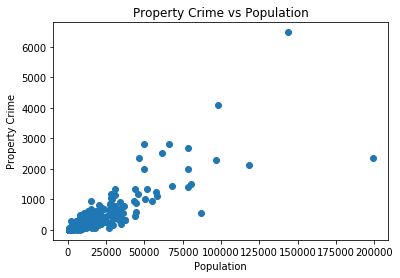

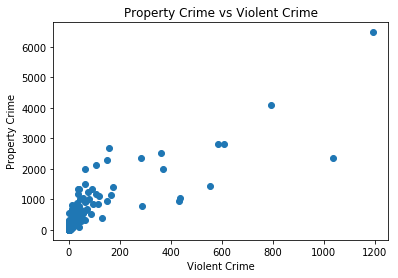

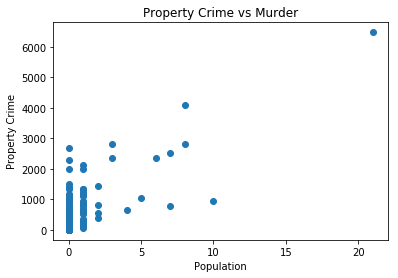

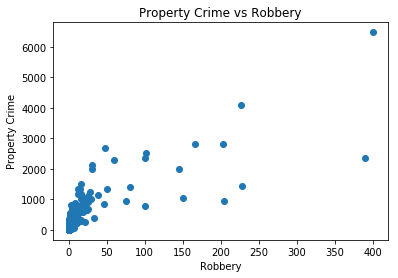

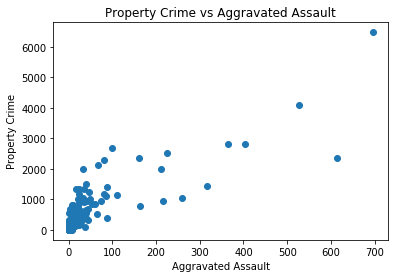

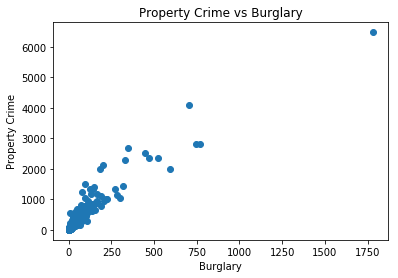

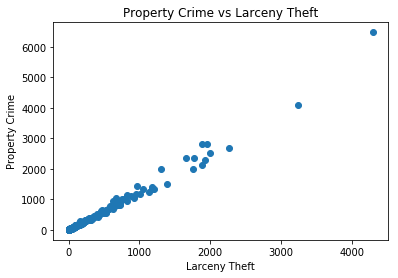

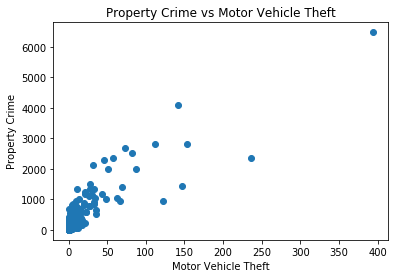

In [6]:
# Set up the matplotlib figures

plt.scatter(train['Population'], train['Property Crime'])
plt.xlabel('Population')
plt.ylabel('Property Crime')
plt.title('Property Crime vs Population')
plt.show()

plt.scatter(train['Violent Crime'], train['Property Crime'])
plt.xlabel('Violent Crime')
plt.ylabel('Property Crime')
plt.title('Property Crime vs Violent Crime')
plt.show()

plt.scatter(train['Murder'], train['Property Crime'])
plt.xlabel('Population')
plt.ylabel('Property Crime')
plt.title('Property Crime vs Murder')
plt.show()

plt.scatter(train['Robbery'], train['Property Crime'])
plt.xlabel('Robbery')
plt.ylabel('Property Crime')
plt.title('Property Crime vs Robbery')
plt.show()

plt.scatter(train['Aggravated Assault'], train['Property Crime'])
plt.xlabel('Aggravated Assault')
plt.ylabel('Property Crime')
plt.title('Property Crime vs Aggravated Assault')
plt.show()

plt.scatter(train['Burglary'], train['Property Crime'])
plt.xlabel('Burglary')
plt.ylabel('Property Crime')
plt.title('Property Crime vs Burglary')
plt.show()

plt.scatter(train['Larceny Theft'], train['Property Crime'])
plt.xlabel('Larceny Theft')
plt.ylabel('Property Crime')
plt.title('Property Crime vs Larceny Theft')
plt.show()

plt.scatter(train['Motor Vehicle Theft'], train['Property Crime'])
plt.xlabel('Motor Vehicle Theft')
plt.ylabel('Property Crime')
plt.title('Property Crime vs Motor Vehicle Theft')
plt.show()

In [7]:
#make a relevant features DataFrame
features = pd.DataFrame()

#Add Relevant Features
features['Pop'] = train['Population']
features['Pop^2'] = train['Population'] * train['Population']
features['Murder'] = train['Murder'].where(train['Murder'] == 0, 1)
features['Robbery'] = train['Robbery'].where(train['Robbery'] == 0, 1)
features['Larceny Theft'] = train['Larceny Theft']
features['Burglary'] = train['Burglary']
#features['Motor Vehicle Theft'] = train['Motor Vehicle Theft']

In [8]:
#Define Variables for Model
#Start w/ Features
X_train = features
#Then Outcome
y_train = train.loc[:, 'Property Crime']

In [9]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_train, y_train))


Coefficients: 
 [ 1.00437639e-04  3.67483005e-09 -6.33926724e-02 -3.00183557e-01
  9.84626604e-01  1.19937153e+00]

Intercept: 
 -0.6367903595644293

R-squared:
0.9997741975969432


# LOOKS TOO GOOD TO BE TRUE 

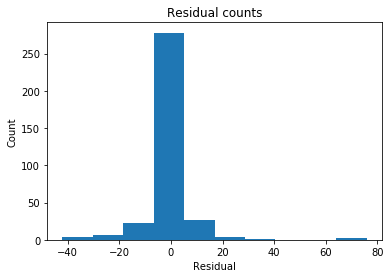

In [11]:
# Extract predicted values for original model.
predicted = regr.predict(X_train).ravel()
actual = y_train.values

# Calculate the error, also called the residual.
residual = actual - predicted
residual = residual.reshape(-1,1)

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

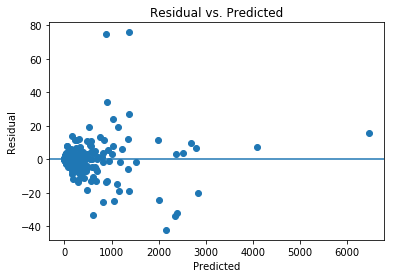

In [12]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [13]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regr, X = X_train, y = y_train, cv = 10)

In [14]:
acc=pd.DataFrame()
acc['Accuracies'] = accuracies
acc.head(10)

,Accuracies
0,1.000
1,1.000
2,0.999
3,0.999
4,1.000
5,0.998
6,1.000
7,0.999
8,1.000
9,1.000


well definitely looks good to be true, let's try it on another data set (Pennsylvania 2013)

In [15]:
#Import the Data 
#make the DataFrame
test = pd.read_excel('pennsylvania.xls', sheet_name='Sheet 1')

In [16]:
test = cleaner(test)
test.head()

3,City,Population,Violent Crime,Murder,Rape (revised definition)1,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny Theft,Motor Vehicle Theft,Arson3
0,"Abington Township, Lackawanna County",1750,1,0,0,0,1,14,4,10,0,0
1,"Abington Township, Montgomery County",55559,63,0,5,28,30,1146,169,952,25,4
2,Adamstown,1845,0,0,0,0,0,20,4,12,4,0
3,"Adams Township, Butler County",12582,8,0,0,0,8,63,11,51,1,0
4,"Adams Township, Cambria County",5868,0,0,0,0,0,25,9,16,0,0


In [17]:
#make a relevant features DataFrame
features_test = pd.DataFrame()

#Add Relevant Features
features_test['Pop'] = test['Population']
features_test['Pop^2'] = test['Population'] * test['Population']
features_test['Murder'] = test['Murder'].where(test['Murder'] == 0, 1)
features_test['Robbery'] = test['Robbery'].where(test['Robbery'] == 0, 1)
features_test['Larceny Theft'] = test['Larceny Theft']
features_test['Burglary'] = test['Burglary']
#features_test['Motor Vehicle Theft'] = test['Motor Vehicle Theft']

In [18]:
#Define Variables for Model
#Start w/ Features
Length = len(features_test) -2
X_test = features_test.loc[0:Length]
#Then Outcome
y_test = test.loc[0:Length, 'Property Crime']

In [19]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test, y_test))


Coefficients: 
 [ 1.00437639e-04  3.67483005e-09 -6.33926724e-02 -3.00183557e-01
  9.84626604e-01  1.19937153e+00]

Intercept: 
 -0.6367903595644293

R-squared:
0.9925800134890257


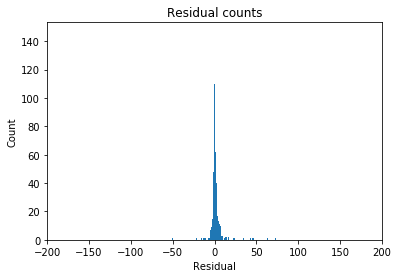

In [20]:
# Extract predicted values for new data set.
predicted = regr.predict(X_test).ravel()
actual = y_test.values

# Calculate the error, also called the residual.
residual = actual - predicted
residual = residual.reshape(-1,1)

plt.hist(residual, bins= "auto")
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.xlim(-200, 200)
plt.show()

Pop
853
853


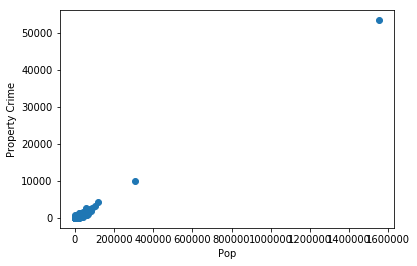

Pop^2
853
853


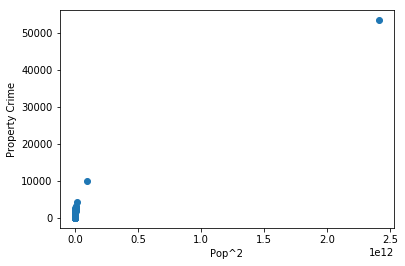

Murder
853
853


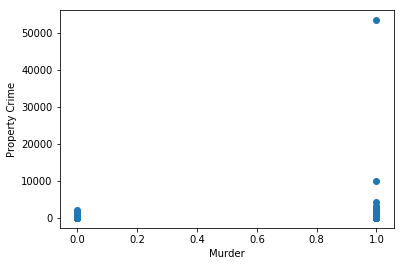

Robbery
853
853


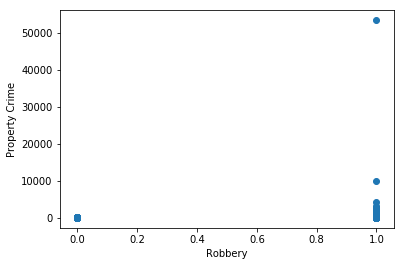

Larceny Theft
853
853


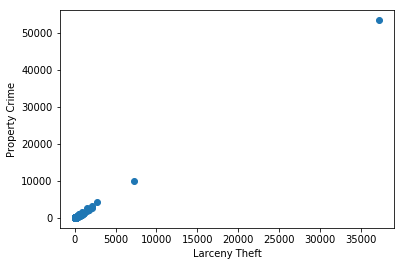

Burglary
853
853


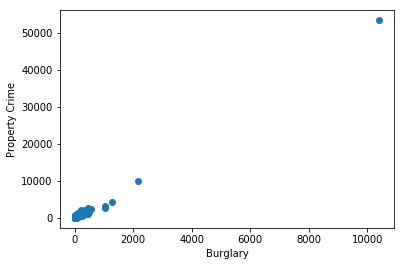

In [21]:
# Set up the matplotlib figures

for x in X_test:
    print(x)
    print(len(X_test.loc[:, x]))
    print(len(y_test.values))
    plt.scatter(X_test.loc[:, x], y_test.values)
    plt.xlabel(x)
    plt.ylabel('Property Crime')
    plt.show()
    

In [22]:
#not sure where i've gone wrong. but my model cannot be that good??

In [23]:
test_path = 'https://raw.githubusercontent.com/gurkpet/Thinkful-Lessons/8b1bfca035fc0505813326ee7ceb370d514e1884/Thinkful%202.5.1%20-%20Test%20Statistics/Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.txt'
test_data1 = pd.DataFrame()
test_data1 = pd.read_table(test_path, engine = "python", thousands = ",")
test_data1.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,1851.000,0.000,0.000,nan,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000,nan
1,Addison Town and Village,2568.000,2.000,0.000,nan,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000,nan
2,Afton Village4,820.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000,nan
3,Akron Village,2842.000,1.000,0.000,nan,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000,nan
4,Albany4,98595.000,802.000,8.000,54.000,nan,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000,nan


In [24]:
print(test_data1.columns)
#test1 = cleaner(test_data1)
test1 = test_data1
test1.drop('Unnamed: 13', axis = 1, inplace = True)
test1.drop('Arson3', axis = 1, inplace = True)
test1.drop('Rape\n(revised\ndefinition)1', axis = 1, inplace = True)
test1.drop('Rape\n(legacy\ndefinition)2', axis = 1, inplace = True)
test1 = test1.dropna()
test1.head()

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'Unnamed: 13'],
      dtype='object')


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,Adams Village,1851.000,0.000,0.000,0.000,0.000,11.000,1.000,10.000,0.000
1,Addison Town and Village,2568.000,2.000,0.000,1.000,1.000,49.000,1.000,47.000,1.000
2,Afton Village4,820.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
3,Akron Village,2842.000,1.000,0.000,0.000,1.000,17.000,0.000,17.000,0.000
4,Albany4,98595.000,802.000,8.000,237.000,503.000,3888.000,683.000,3083.000,122.000


In [25]:
test1.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
count,368.000,368.000,368.000,368.000,368.000,368.000,368.000,368.000,368.000
mean,37888.399,184.179,1.457,60.823,112.302,698.361,101.160,562.791,34.410
std,441757.416,2642.418,17.718,867.655,1642.738,7123.614,856.253,5869.850,407.507
min,79.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2628.250,1.000,0.000,0.000,0.000,25.000,4.000,20.000,0.000
50%,6564.500,5.000,0.000,1.000,3.000,76.000,12.500,60.500,2.000
75%,15534.750,18.250,0.000,4.000,12.000,271.500,39.000,228.500,6.000
max,8473938.000,50564.000,333.000,16581.000,31460.000,135747.000,15916.000,112107.000,7724.000


In [26]:
#make a relevant features DataFrame
features_test1 = pd.DataFrame()

#Add Relevant Features
features_test1['Pop'] = test1['Population']
features_test1['Pop^2'] = test1['Population'] * test1['Population']
features_test1['Murder'] = test1['Murder and\nnonnegligent\nmanslaughter'].where(test1['Murder and\nnonnegligent\nmanslaughter'] == 0, 1)
features_test1['Robbery'] = test1['Robbery'].where(test1['Robbery'] == 0, 1)
features_test1['Larceny Theft'] = test1['Larceny-\ntheft']
features_test1['Burglary'] = test1['Burglary']
features_test1.describe()

,Pop,Pop^2,Murder,Robbery,Larceny Theft,Burglary
count,368.000,368.000,368.000,368.000,368.000,368.000
mean,37888.399,196054847336.171,0.139,0.530,562.791,101.160
std,441757.416,3743186107180.661,0.346,0.500,5869.850,856.253
min,79.000,6241.000,0.000,0.000,0.000,0.000
25%,2628.250,6907720.750,0.000,0.000,20.000,4.000
50%,6564.500,43092932.500,0.000,1.000,60.500,12.500
75%,15534.750,241376654.250,0.000,1.000,228.500,39.000
max,8473938.000,71807625227844.000,1.000,1.000,112107.000,15916.000


In [27]:
#Define Variables for Model
#Start w/ Features
Length = len(features_test) -2
X_test1 = features_test1.loc[0:Length]
#Then Outcome
y_test1 = test1.loc[0:Length, 'Property\ncrime']

In [28]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test1, y_test1))


Coefficients: 
 [ 1.00437639e-04  3.67483005e-09 -6.33926724e-02 -3.00183557e-01
  9.84626604e-01  1.19937153e+00]

Intercept: 
 -0.6367903595644293

R-squared:
-2.5868173663963128


In [ ]:
# Extract predicted values for new data set.
predicted = regr.predict(X_test1).ravel()
actual = y_test1.values

# Calculate the error, also called the residual.
residual = actual - predicted
residual = residual.reshape(-1,1)
print(residual)
#plt.hist(residual, bins= "auto")
#plt.title('Residual counts')
#plt.xlabel('Residual')
#plt.ylabel('Count')
#plt.show()

In [ ]:
# Set up the matplotlib figures

for x in X_test1:
    print(x)
    print(len(X_test1.loc[:, x]))
    print(len(y_test1.values))
    plt.scatter(X_test1.loc[:, x], y_test.values)
    plt.xlabel(x)
    plt.ylabel('Property Crime')
    plt.show()
    